<a href="https://colab.research.google.com/github/Krishnadev-cmd/House-Energy-/blob/main/Energy_LocalPreprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DataSets/household_power_consumption.txt',sep=';',parse_dates={'datetime':['Date','Time']},low_memory=False,na_values=['?'],)
df

/tmp/ipython-input-926224814.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv('/content/drive/MyDrive/DataSets/household_power_consumption.txt',sep=';',parse_dates={'datetime':['Date','Time']},low_memory=False,na_values=['?'],)
/tmp/ipython-input-926224814.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df=pd.read_csv('/content/drive/MyDrive/DataSets/household_power_consumption.txt',sep=';',parse_dates={'datetime':['Date','Time']},low_memory=False,na_values=['?'],)


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [ ]:
print(df.shape)

(2075259, 8)


In [ ]:
print(df.dtypes)

datetime                 datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object


In [ ]:
print(df.isnull().sum())

datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [ ]:
print(df.describe)

<bound method NDFrame.describe of                    datetime  Global_active_power  Global_reactive_power  \
0       2006-12-16 17:24:00                4.216                  0.418   
1       2006-12-16 17:25:00                5.360                  0.436   
2       2006-12-16 17:26:00                5.374                  0.498   
3       2006-12-16 17:27:00                5.388                  0.502   
4       2006-12-16 17:28:00                3.666                  0.528   
...                     ...                  ...                    ...   
2075254 2010-11-26 20:58:00                0.946                  0.000   
2075255 2010-11-26 20:59:00                0.944                  0.000   
2075256 2010-11-26 21:00:00                0.938                  0.000   
2075257 2010-11-26 21:01:00                0.934                  0.000   
2075258 2010-11-26 21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_

In [ ]:
df=df.dropna()

In [ ]:
print(df.shape)

(2049280, 8)


In [ ]:
df.set_index('datetime',inplace=True)

In [ ]:
df = df.sort_index()

In [ ]:
df_hourly = df.resample('H').agg({
    'Global_active_power': ['mean', 'max', 'min', 'std'],
    'Global_reactive_power': 'mean',
    'Voltage': 'mean',
    'Global_intensity': 'mean'
})

# Flatten column names
df_hourly.columns = ['_'.join(col).strip() for col in df_hourly.columns.values]
df_hourly.reset_index(inplace=True)
df_hourly

/tmp/ipython-input-2557389631.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').agg({


,datetime,Global_active_power_mean,Global_active_power_max,Global_active_power_min,Global_active_power_std,Global_reactive_power_mean,Voltage_mean,Global_intensity_mean
0,2006-12-16 17:00:00,4.222889,7.706,2.472,1.162359,0.229000,234.643889,18.100000
1,2006-12-16 18:00:00,3.632200,6.752,2.188,1.175726,0.080033,234.580167,15.600000
2,2006-12-16 19:00:00,3.400233,4.070,3.202,0.135354,0.085233,233.232500,14.503333
3,2006-12-16 20:00:00,3.268567,3.496,1.832,0.264286,0.075100,234.071500,13.916667
4,2006-12-16 21:00:00,3.056467,3.502,1.692,0.576796,0.076667,237.158667,13.046667
...,...,...,...,...,...,...,...,...
34584,2010-11-26 17:00:00,1.725900,2.140,0.604,0.504386,0.061400,237.069667,7.216667
34585,2010-11-26 18:00:00,1.573467,1.826,0.998,0.269775,0.053700,237.531833,6.620000
34586,2010-11-26 19:00:00,1.659333,2.764,1.070,0.411593,0.060033,236.741000,7.056667
34587,2010-11-26 20:00:00,1.163700,2.300,0.908,0.310324,0.061167,239.396000,4.913333


In [ ]:
print(f"\nHourly aggregated shape: {df_hourly.shape}")


Hourly aggregated shape: (34589, 8)


In [ ]:
df_hourly.to_csv('household_power_hourly.csv', index=False)
print("\nSaved cleaned hourly data to 'household_power_hourly.csv'")


Saved cleaned hourly data to 'household_power_hourly.csv'


Saved plot to 'energy_consumption_plot.png'


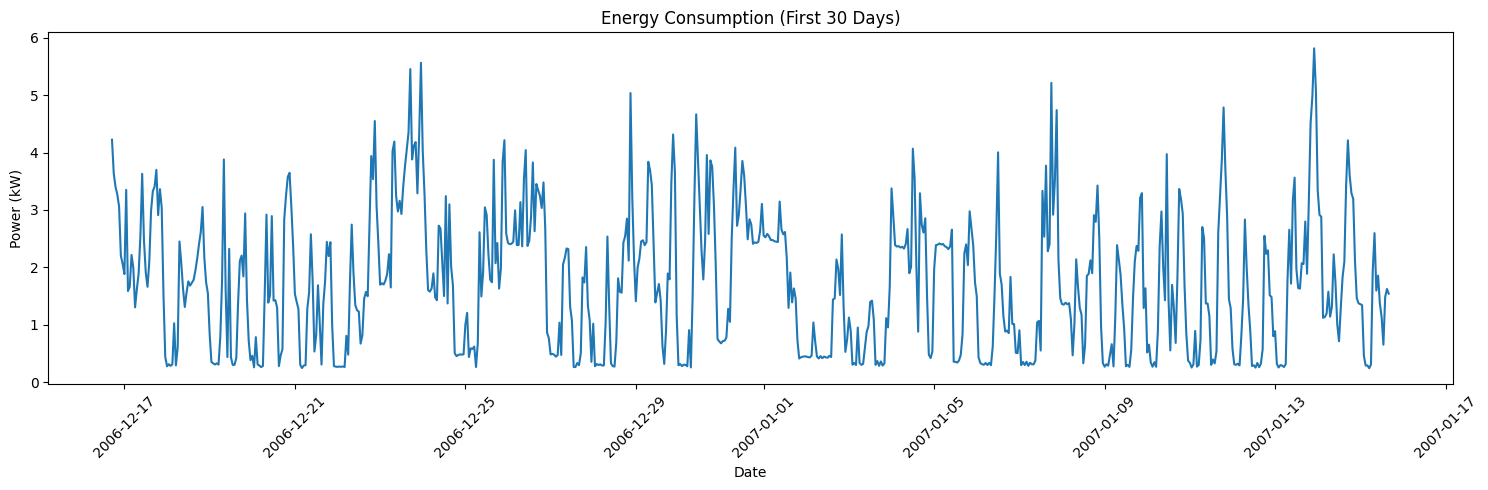

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df_hourly['datetime'][:24*30], df_hourly['Global_active_power_mean'][:24*30])
plt.title('Energy Consumption (First 30 Days)')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('energy_consumption_plot.png')
print("Saved plot to 'energy_consumption_plot.png'")